In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
def graph_gen(a,b):

  # Create a directed graph
  G = nx.DiGraph()

  # Add nodes for 5 individuals
  G.add_node("Alice")
  G.add_node("Bob")
  G.add_node("Carol")
  G.add_node("Deniz")
  G.add_node("Eylul")

  transitions = [

      ("Alice", "Alice", 0.05*b),
      ("Bob", "Bob", 0.05*b),
      ("Carol", "Carol", 0.05*b),
      ("Deniz", "Deniz", 0.05*b),
      ("Eylul", "Eylul", 0.05*b),

      ("Alice", "Bob", 0.1*a),
      ("Bob", "Alice", 0.1*a),
      ("Bob", "Carol", 0.1*a),
      ("Carol", "Bob", 0.1*a),
      ("Alice", "Carol", 0.1*a),
      ("Carol", "Alice", 0.1*a),
      ("Alice", "Eylul", 0.1*a),
      ("Eylul", "Alice", 0.1*a),
      ("Deniz", "Eylul", 0.1*a),
      ("Eylul", "Deniz", 0.1*a),
      ("Bob", "Deniz", 0.1*a),
      ("Deniz", "Bob", 0.1*a),
      ("Carol", "Eylul", 0.1*a),
      ("Eylul", "Carol", 0.1*a),
      ("Carol", "Deniz", 0.1*a),
      ("Deniz", "Carol", 0.1*a),
      ("Alice", "Deniz", 0.1*a),
      ("Deniz", "Alice", 0.1*a),
      ("Bob", "Eylul", 0.1*a),
      ("Eylul", "Bob", 0.1*a),
  ]

  # Add edges to the graph
  for src, dst, weight in transitions:
      G.add_edge(src, dst, weight=weight)

  return G

In [ ]:
def drawGraph(G):
  # Position nodes using a layout
  pos = nx.circular_layout(G)

  # Draw the graph
  nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)

  # Draw edge labels (weights)
  edge_labels = nx.get_edge_attributes(G, 'weight')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

  # Show plot
  plt.show()

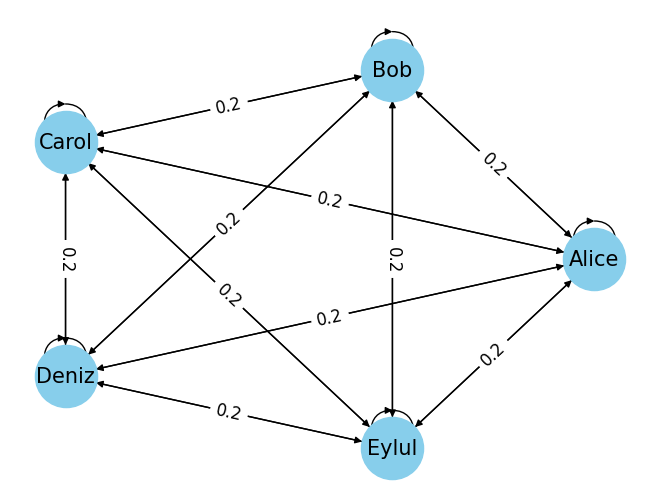

In [ ]:
myGraph = graph_gen(2,1)
drawGraph(myGraph)

In [ ]:
def genP(G):
  adj_matrix = nx.to_numpy_array(G)
  adj_matrix

  # Creating a NumPy array 'nums' containing a set of integers
  number_of_nodes = G.number_of_nodes()
  states = np.arange(2**number_of_nodes)

  # Displaying the original vector 'nums'
  #print("Original vector:")
  #print(states)

  # Creating a binary representation of 'nums' using bitwise operations and reshaping
  # The resultant array represents the binary representation of each element in 'nums'
  states = ((states.reshape(-1, 1) & (2 ** np.arange(number_of_nodes))) != 0).astype(int)

  # Displaying the binary representation of the vector 'nums'
  #print("\nBinary representation of the said vector:")
  #print(states)  # Reversing the columns to display binary digits in the correct order

  no_of_states = len(states)
  #print(f"no of states = {no_of_states}")
  P = np.empty((no_of_states,no_of_states))
  for i in range(no_of_states):
      for j in range(no_of_states):
          s_init = states[i]
          s_target = states[j]
          p_healthy = np.prod(1-(s_init * adj_matrix), axis=1)
          P[i,j] = np.prod(np.abs(s_target-p_healthy))
  np.set_printoptions(precision=3)
  return P
genP(G)

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [6.233e-01, 3.281e-02, 6.925e-02, ..., 4.500e-05, 9.500e-05,
        5.000e-06],
       [6.233e-01, 6.925e-02, 3.281e-02, ..., 9.500e-05, 4.500e-05,
        5.000e-06],
       ...,
       [1.509e-01, 6.700e-02, 7.911e-02, ..., 5.862e-03, 6.922e-03,
        3.073e-03],
       [1.509e-01, 7.911e-02, 6.700e-02, ..., 6.922e-03, 5.862e-03,
        3.073e-03],
       [9.407e-02, 5.686e-02, 5.686e-02, ..., 1.255e-02, 1.255e-02,
        7.586e-03]])

<function matplotlib.pyplot.show(close=None, block=None)>

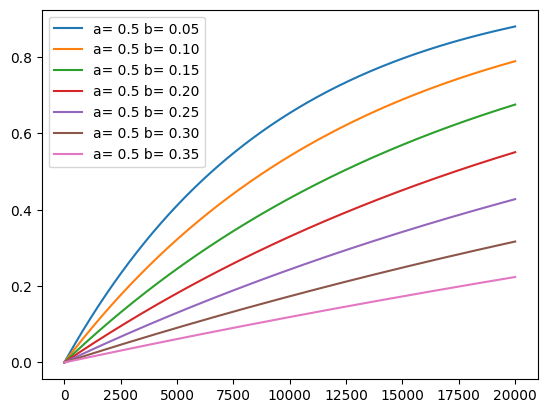

In [ ]:
for a in [5]:
  for b in [1,2,3,4,5,6,7]:
    c = graph_gen(a,b)
    z = genP(c)

    my_arr = []
    for i in range(1,20000):
      my_arr.append(np.linalg.matrix_power(z, i)[31,0])
    plt.plot(my_arr,label=f"a={0.1*a : .1f} b={0.05*b : 0.2f}")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

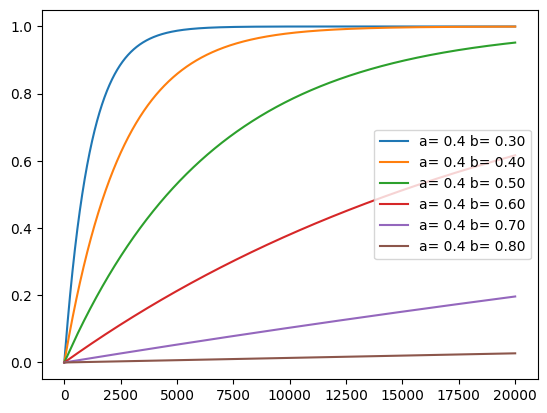

In [ ]:
for a in [10]:
  for b in range(6,17,2):
    c = graph_gen(a,b)
    z = genP(c)

    my_arr = []
    for i in range(1,20000):
      my_arr.append(np.linalg.matrix_power(z, i)[31,0])
    plt.plot(my_arr,label=f"a={0.1*a : .1f} b={0.05*b : 0.2f}")
plt.legend()
plt.show

In [ ]:
z.shape
eigenvalues, eigenvectors = np.linalg.eig(z)

array([1.   +0.000e+00j, 0.248+0.000e+00j, 0.172+0.000e+00j,
       0.062+0.000e+00j, 0.089+2.481e-16j, 0.089-2.481e-16j,
       0.013+0.000e+00j, 0.108+0.000e+00j, 0.108+1.812e-16j,
       0.108-1.812e-16j, 0.108+0.000e+00j, 0.089+0.000e+00j,
       0.089+0.000e+00j, 0.037+0.000e+00j, 0.037+7.847e-17j,
       0.037-7.847e-17j, 0.037+0.000e+00j, 0.011+0.000e+00j,
       0.011+1.399e-17j, 0.011-1.399e-17j, 0.011+0.000e+00j,
       0.013+0.000e+00j, 0.027+0.000e+00j, 0.027+0.000e+00j,
       0.027+0.000e+00j, 0.027+0.000e+00j, 0.027+0.000e+00j,
       0.013+1.684e-17j, 0.013-1.684e-17j, 0.013+0.000e+00j,
       0.013+0.000e+00j, 1.   +0.000e+00j])

In [ ]:
eigenvalues
eigenvalues.shape
eigenvalues[0]

(0.9999986186366692+0j)

In [ ]:
def steady_state_prop(p):
    dim = p.shape[0]
    q = (p-np.eye(dim))
    ones = np.ones(dim)
    q = np.c_[q,ones]
    QTQ = np.dot(q, q.T)
    bQT = np.ones(dim)
    return np.linalg.solve(QTQ,bQT)


result = steady_state_prop(z)
print(result)
print(np.dot(z.T, result))
print()

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]



In [ ]:
eigenvectors
eigenvectors.shape
eigenvectors.T[30]

array([ 0.000e+00+0.j,  1.822e-13+0.j,  1.881e-13+0.j,  5.321e-01+0.j,
        1.871e-13+0.j,  2.134e-01+0.j, -2.930e-01+0.j, -1.007e-01+0.j,
        1.554e-13+0.j, -4.616e-01+0.j, -8.453e-02+0.j,  3.121e-03+0.j,
        9.359e-02+0.j,  3.440e-02+0.j,  6.317e-02+0.j, -3.727e-15+0.j,
        1.715e-13+0.j, -2.839e-01+0.j, -1.546e-01+0.j, -2.082e-02+0.j,
       -1.402e-02+0.j,  1.881e-02+0.j,  1.027e-01+0.j, -3.727e-15+0.j,
        4.525e-01+0.j,  6.519e-02+0.j, -4.748e-02+0.j, -3.475e-15+0.j,
       -1.184e-01+0.j, -3.535e-15+0.j, -3.523e-15+0.j,  3.236e-16+0.j])

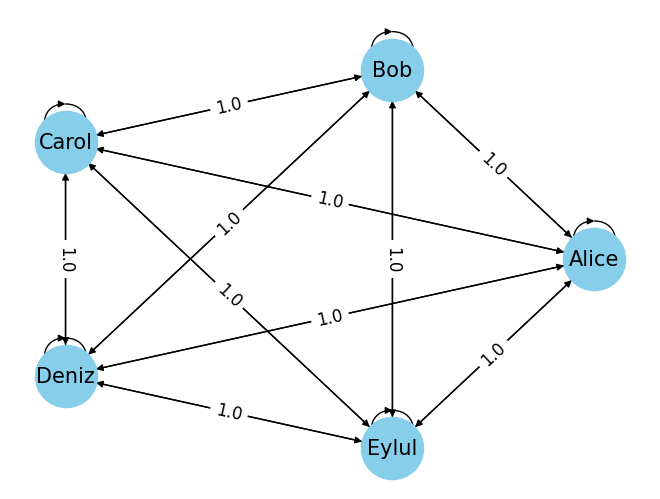

Original vector:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]

Binary representation of the said vector:
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 1 0 0 0]
 [0 0 1 0 0]
 [1 0 1 0 0]
 [0 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 1 0]
 [1 0 0 1 0]
 [0 1 0 1 0]
 [1 1 0 1 0]
 [0 0 1 1 0]
 [1 0 1 1 0]
 [0 1 1 1 0]
 [1 1 1 1 0]
 [0 0 0 0 1]
 [1 0 0 0 1]
 [0 1 0 0 1]
 [1 1 0 0 1]
 [0 0 1 0 1]
 [1 0 1 0 1]
 [0 1 1 0 1]
 [1 1 1 0 1]
 [0 0 0 1 1]
 [1 0 0 1 1]
 [0 1 0 1 1]
 [1 1 0 1 1]
 [0 0 1 1 1]
 [1 0 1 1 1]
 [0 1 1 1 1]
 [1 1 1 1 1]]
no of states = 32


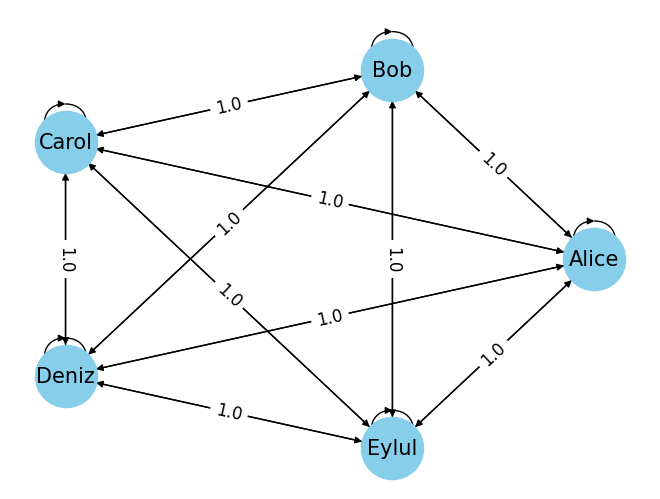

Original vector:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]

Binary representation of the said vector:
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 1 0 0 0]
 [0 0 1 0 0]
 [1 0 1 0 0]
 [0 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 1 0]
 [1 0 0 1 0]
 [0 1 0 1 0]
 [1 1 0 1 0]
 [0 0 1 1 0]
 [1 0 1 1 0]
 [0 1 1 1 0]
 [1 1 1 1 0]
 [0 0 0 0 1]
 [1 0 0 0 1]
 [0 1 0 0 1]
 [1 1 0 0 1]
 [0 0 1 0 1]
 [1 0 1 0 1]
 [0 1 1 0 1]
 [1 1 1 0 1]
 [0 0 0 1 1]
 [1 0 0 1 1]
 [0 1 0 1 1]
 [1 1 0 1 1]
 [0 0 1 1 1]
 [1 0 1 1 1]
 [0 1 1 1 1]
 [1 1 1 1 1]]
no of states = 32


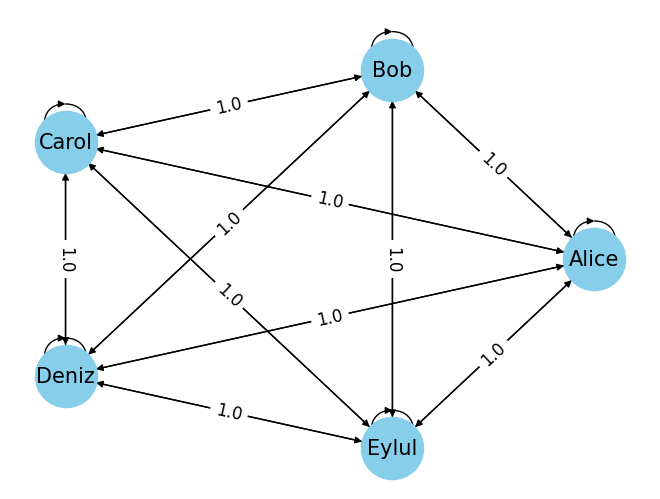

Original vector:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]

Binary representation of the said vector:
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 1 0 0 0]
 [0 0 1 0 0]
 [1 0 1 0 0]
 [0 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 1 0]
 [1 0 0 1 0]
 [0 1 0 1 0]
 [1 1 0 1 0]
 [0 0 1 1 0]
 [1 0 1 1 0]
 [0 1 1 1 0]
 [1 1 1 1 0]
 [0 0 0 0 1]
 [1 0 0 0 1]
 [0 1 0 0 1]
 [1 1 0 0 1]
 [0 0 1 0 1]
 [1 0 1 0 1]
 [0 1 1 0 1]
 [1 1 1 0 1]
 [0 0 0 1 1]
 [1 0 0 1 1]
 [0 1 0 1 1]
 [1 1 0 1 1]
 [0 0 1 1 1]
 [1 0 1 1 1]
 [0 1 1 1 1]
 [1 1 1 1 1]]
no of states = 32


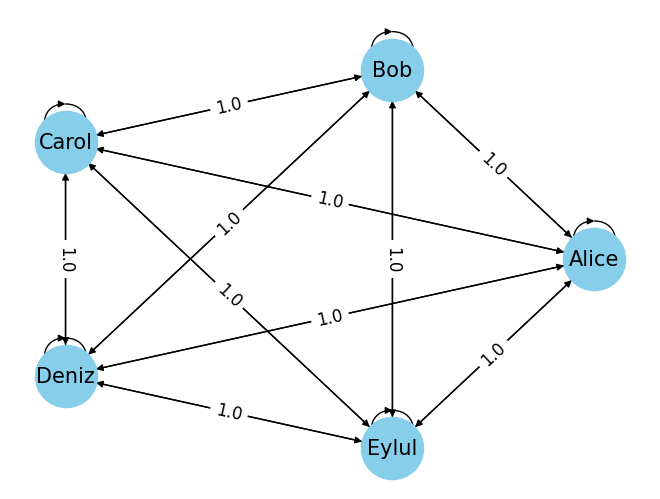

Original vector:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]

Binary representation of the said vector:
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 1 0 0 0]
 [0 0 1 0 0]
 [1 0 1 0 0]
 [0 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 1 0]
 [1 0 0 1 0]
 [0 1 0 1 0]
 [1 1 0 1 0]
 [0 0 1 1 0]
 [1 0 1 1 0]
 [0 1 1 1 0]
 [1 1 1 1 0]
 [0 0 0 0 1]
 [1 0 0 0 1]
 [0 1 0 0 1]
 [1 1 0 0 1]
 [0 0 1 0 1]
 [1 0 1 0 1]
 [0 1 1 0 1]
 [1 1 1 0 1]
 [0 0 0 1 1]
 [1 0 0 1 1]
 [0 1 0 1 1]
 [1 1 0 1 1]
 [0 0 1 1 1]
 [1 0 1 1 1]
 [0 1 1 1 1]
 [1 1 1 1 1]]
no of states = 32


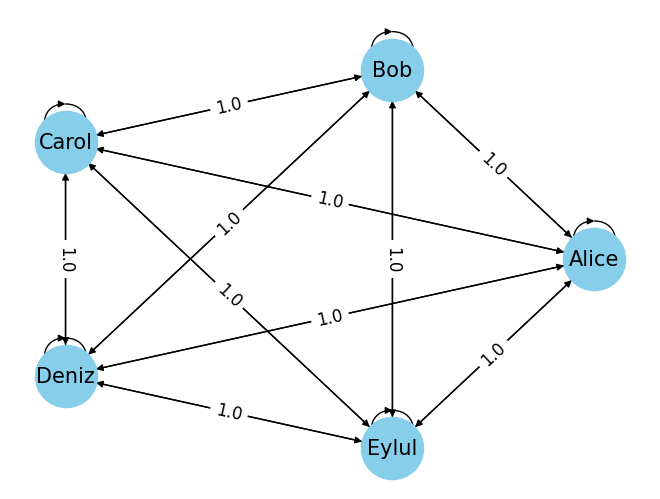

Original vector:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]

Binary representation of the said vector:
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 1 0 0 0]
 [0 0 1 0 0]
 [1 0 1 0 0]
 [0 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 1 0]
 [1 0 0 1 0]
 [0 1 0 1 0]
 [1 1 0 1 0]
 [0 0 1 1 0]
 [1 0 1 1 0]
 [0 1 1 1 0]
 [1 1 1 1 0]
 [0 0 0 0 1]
 [1 0 0 0 1]
 [0 1 0 0 1]
 [1 1 0 0 1]
 [0 0 1 0 1]
 [1 0 1 0 1]
 [0 1 1 0 1]
 [1 1 1 0 1]
 [0 0 0 1 1]
 [1 0 0 1 1]
 [0 1 0 1 1]
 [1 1 0 1 1]
 [0 0 1 1 1]
 [1 0 1 1 1]
 [0 1 1 1 1]
 [1 1 1 1 1]]
no of states = 32


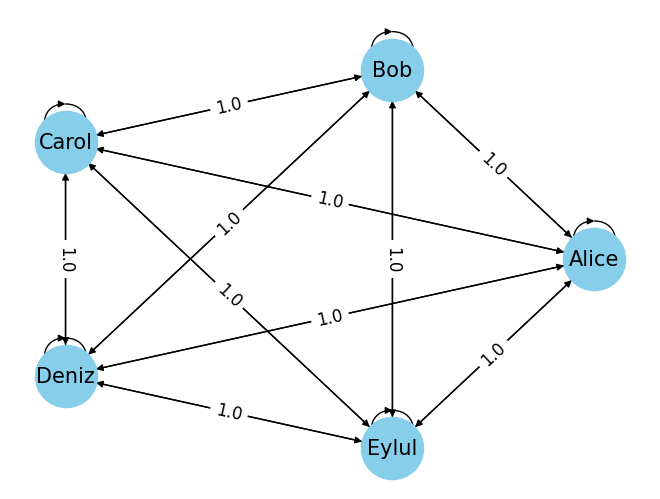

Original vector:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]

Binary representation of the said vector:
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 1 0 0 0]
 [0 0 1 0 0]
 [1 0 1 0 0]
 [0 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 1 0]
 [1 0 0 1 0]
 [0 1 0 1 0]
 [1 1 0 1 0]
 [0 0 1 1 0]
 [1 0 1 1 0]
 [0 1 1 1 0]
 [1 1 1 1 0]
 [0 0 0 0 1]
 [1 0 0 0 1]
 [0 1 0 0 1]
 [1 1 0 0 1]
 [0 0 1 0 1]
 [1 0 1 0 1]
 [0 1 1 0 1]
 [1 1 1 0 1]
 [0 0 0 1 1]
 [1 0 0 1 1]
 [0 1 0 1 1]
 [1 1 0 1 1]
 [0 0 1 1 1]
 [1 0 1 1 1]
 [0 1 1 1 1]
 [1 1 1 1 1]]
no of states = 32


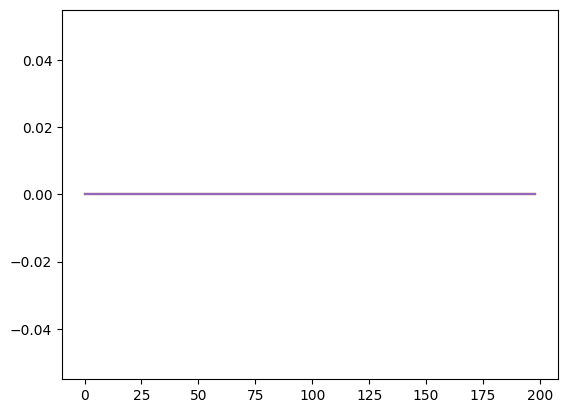

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import product

# Create a directed graph
G = nx.DiGraph()

# Add nodes for 5 individuals
G.add_node("Alice")
G.add_node("Bob")
G.add_node("Carol")
G.add_node("Deniz")
G.add_node("Eylul")

a_values = [1, 3, 5, 7, 10]
b_value = 2
for z in range(len(a_values)+1):
  transitions = [

      ("Alice", "Alice", 0.05*b),
      ("Bob", "Bob", 0.05*b),
      ("Carol", "Carol", 0.05*b),
      ("Deniz", "Deniz", 0.05*b),
      ("Eylul", "Eylul", 0.05*b),

      ("Alice", "Bob", 0.1*a),
      ("Bob", "Alice", 0.1*a),
      ("Bob", "Carol", 0.1*a),
      ("Carol", "Bob", 0.1*a),
      ("Alice", "Carol", 0.1*a),
      ("Carol", "Alice", 0.1*a),
      ("Alice", "Eylul", 0.1*a),
      ("Eylul", "Alice", 0.1*a),
      ("Deniz", "Eylul", 0.1*a),
      ("Eylul", "Deniz", 0.1*a),
      ("Bob", "Deniz", 0.1*a),
      ("Deniz", "Bob", 0.1*a),
      ("Carol", "Eylul", 0.1*a),
      ("Eylul", "Carol", 0.1*a),
      ("Carol", "Deniz", 0.1*a),
      ("Deniz", "Carol", 0.1*a),
      ("Alice", "Deniz", 0.1*a),
      ("Deniz", "Alice", 0.1*a),
      ("Bob", "Eylul", 0.1*a),
      ("Eylul", "Bob", 0.1*a),
  ]

  # Add edges to the graph
  for src, dst, weight in transitions:
      G.add_edge(src, dst, weight=weight)

  # Position nodes using a layout
  pos = nx.circular_layout(G)

  # Draw the graph
  nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)

  # Draw edge labels (weights)
  edge_labels = nx.get_edge_attributes(G, 'weight')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

  # Show plot
  plt.show()

  adj_matrix = nx.to_numpy_array(G)
  adj_matrix

  # Creating a NumPy array 'nums' containing a set of integers
  number_of_nodes = G.number_of_nodes()
  states = np.arange(2**number_of_nodes)

  # Displaying the original vector 'nums'
  print("Original vector:")
  print(states)

  # Creating a binary representation of 'nums' using bitwise operations and reshaping
  # The resultant array represents the binary representation of each element in 'nums'
  states = ((states.reshape(-1, 1) & (2 ** np.arange(number_of_nodes))) != 0).astype(int)

  # Displaying the binary representation of the vector 'nums'
  print("\nBinary representation of the said vector:")
  print(states)  # Reversing the columns to display binary digits in the correct order

  no_of_states = len(states)
  print(f"no of states = {no_of_states}")
  P = np.empty((no_of_states,no_of_states))
  for i in range(no_of_states):
      for j in range(no_of_states):
          s_init = states[i]
          s_target = states[j]
          p_healthy = np.prod(1-(s_init * adj_matrix), axis=1)
          P[i,j] = np.prod(np.abs(s_target-p_healthy))
  np.set_printoptions(precision=3)


my_arr = []
for i in range(1,200):
    my_arr.append(np.linalg.matrix_power(P, i)[31,0])
plt.plot(my_arr)

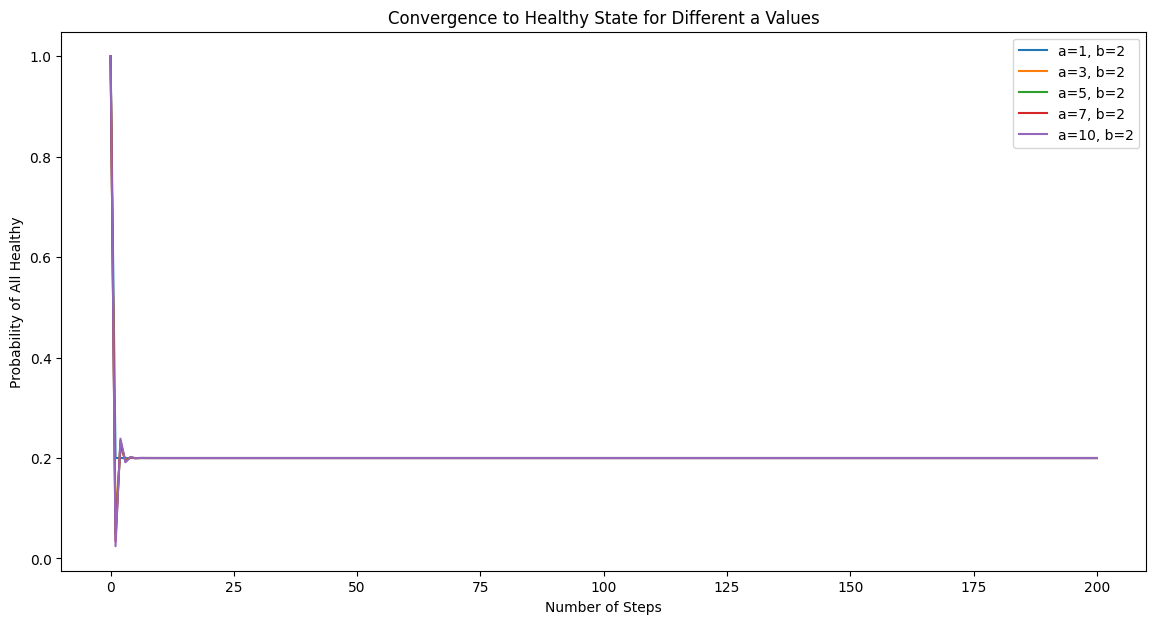

In [ ]:
# Corrected Python script for Markov chain simulation of disease spread

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def adjust_weights(G, a, b):
    # Set self-loop weights
    for node in G.nodes():
        G.add_edge(node, node, weight=b*0.05)

    # Set inter-node weights
    for u, v in G.edges():
        if u != v:
            G[u][v]['weight'] = a*0.1

    return G

def create_transition_matrix(G):
    adj_matrix = nx.to_numpy_array(G)
    # Normalize the matrix so each row sums to 1
    adj_matrix /= adj_matrix.sum(axis=1)[:, None]
    return adj_matrix

def simulate_markov_chain(adj_matrix, initial_state, steps):
    # Record the state at each step
    state_history = [initial_state]
    for _ in range(steps):
        next_state = state_history[-1] @ adj_matrix
        state_history.append(next_state)
    return np.array(state_history)

# Set up the graph with nodes
G = nx.DiGraph()
nodes = ["Alice", "Bob", "Carol", "Deniz", "Eylul"]
G.add_nodes_from(nodes)

# Define initial edges without weights
initial_edges = [
    (nodes[i], nodes[j]) for i in range(len(nodes)) for j in range(len(nodes)) if i != j
]
G.add_edges_from(initial_edges)

# Parameters for different scenarios
a_values = [1, 3, 5, 7, 10]
b_value = 2
steps = 200

# Initial state (assuming the first node is initially sick)
initial_state = np.zeros(len(nodes))
initial_state[0] = 1

# Simulation
plt.figure(figsize=(14, 7))

for a in a_values:
    # Adjust weights according to a and b
    G = adjust_weights(G, a, b_value)

    # Create the transition matrix
    P = create_transition_matrix(G)

    # Run the simulation
    history = simulate_markov_chain(P, initial_state, steps)

    # Plot the probability of returning to the all-healthy state
    plt.plot(history[:, 0], label=f'a={a}, b={b_value}')

plt.xlabel('Number of Steps')
plt.ylabel('Probability of All Healthy')
plt.title('Convergence to Healthy State for Different a Values')
plt.legend()
plt.show()




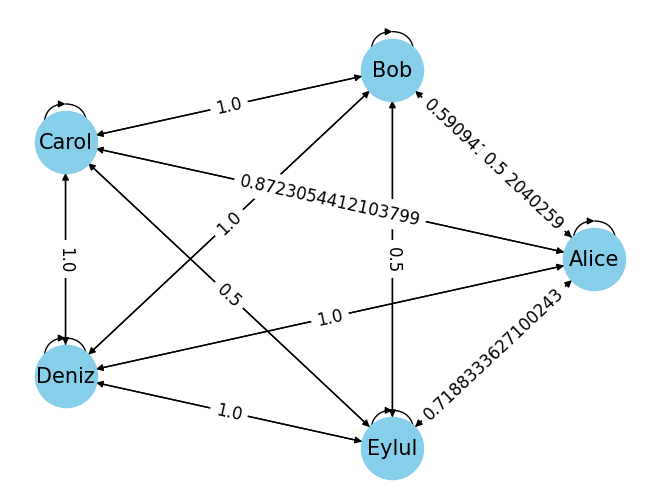

In [ ]:
G = nx.DiGraph()

# Add nodes for 5 individuals
G.add_node("Alice")
G.add_node("Bob")
G.add_node("Carol")
G.add_node("Deniz")
G.add_node("Eylul")
# Given means and variances for the distributions
mean_inter = 0.6
variance_inter = 1
mean_self = 0.8
variance_self = 1

# Function to generate random probabilities with given mean and variance,
# and map values greater than 1 to 1
def random_prob(mean, variance):
    prob = np.random.normal(mean, np.sqrt(variance))
    return np.clip(prob, 0.5, 1)  # Clipping the value between 0 and 1

# Nodes in the graph
nodes = ["Alice", "Bob", "Carol", "Deniz", "Eylul"]

# Initialize an empty list to hold the (source, target, weight) tuples
transitions = []

# Inter-node edges
for i in range(len(nodes)):
    for j in range(len(nodes)):
        if i != j:  # If not a self-edge
            # Append the tuple (source, target, weight) to transitions
            transitions.append((nodes[i], nodes[j], random_prob(mean_inter, variance_inter)))

# Self-edges
for node in nodes:
    # Append the tuple (node, node, weight) to transitions
    transitions.append((node, node, random_prob(mean_self, variance_self)))

# Add edges to the graph
for src, dst, weight in transitions:
    G.add_edge(src, dst, weight=weight)

# Position nodes using a layout
pos = nx.circular_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Show plot
plt.show()

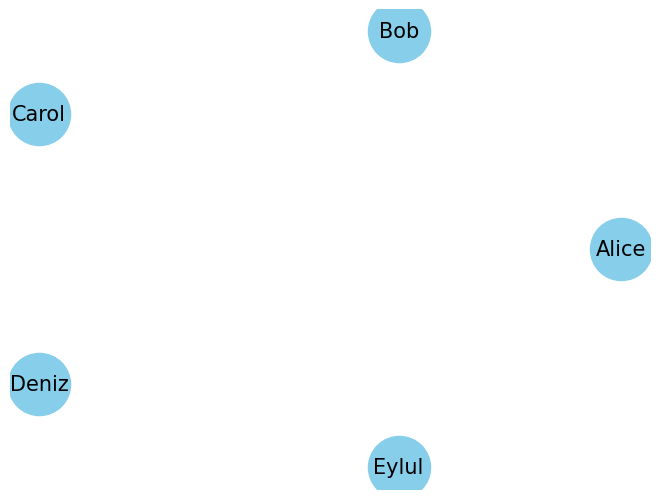

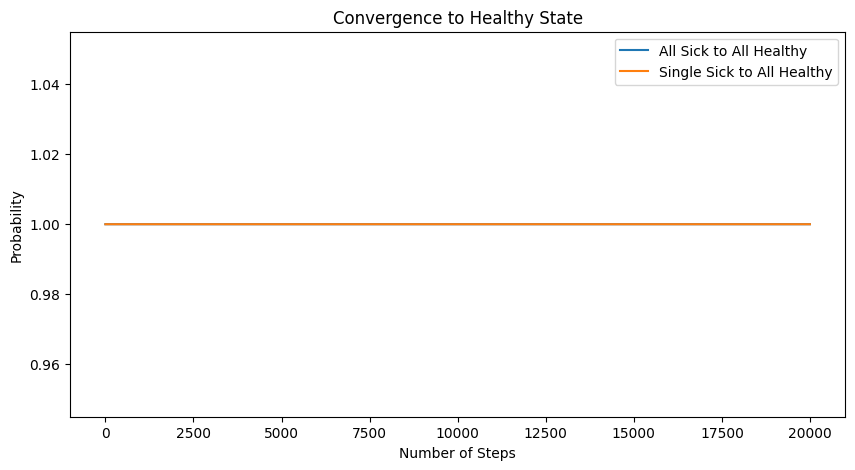

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import product  # Corrected import statement

# Create a directed graph
G = nx.DiGraph()

# Add nodes for 5 individuals
nodes = ["Alice", "Bob", "Carol", "Deniz", "Eylul"]
G.add_nodes_from(nodes)

# Add edges with weights (transition probabilities)
transitions = [
    # ... (your transitions here) ...
]

# Add edges to the graph
G.add_weighted_edges_from(transitions)

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
plt.show()

# Convert the graph to an adjacency matrix
adj_matrix = nx.to_numpy_array(G)

# Compute the state transition matrix P
number_of_nodes = G.number_of_nodes()
states = np.array(list(product([0, 1], repeat=number_of_nodes)))  # Corrected function call

P = np.empty((len(states), len(states)))

for i, s_init in enumerate(states):
    for j, s_target in enumerate(states):
        p_healthy = np.prod(1 - (s_init * adj_matrix), axis=1)
        P[i, j] = np.prod(np.abs(s_target - p_healthy))

# Observe the convergence process
all_sick_arr = []
single_sick_arr = []
steps = 20000

for i in range(1, steps+1):
    powered_matrix = np.linalg.matrix_power(P, i)
    all_sick_arr.append(powered_matrix[-1, 0])  # all sick to all healthy
    single_sick_arr.append(1 - np.prod(1 - powered_matrix[1:number_of_nodes+1, 0]))  # 1 person sick to all healthy

# Plot the convergence process
plt.figure(figsize=(10, 5))
plt.plot(all_sick_arr, label='All Sick to All Healthy')
plt.plot(single_sick_arr, label='Single Sick to All Healthy')
plt.xlabel('Number of Steps')
plt.ylabel('Probability')
plt.title('Convergence to Healthy State')
plt.legend()
plt.show()


In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes for 5 individuals
G.add_node("Alice")
G.add_node("Bob")
G.add_node("Carol")
G.add_node("Deniz")
G.add_node("Eylul")

# Add edges with weights (transition probabilities)
# Assuming the transitions are between all individuals and themselves
internode = np.random.normal(mean_internode, std_dev_internode, (num_nodes, num_nodes))
self = np.random.normal(mean_internode, std_dev_internode, (num_nodes, num_nodes))
transitions = [

    ("Alice", "Alice", 0.1),
    ("Bob", "Bob", 0.1),
    ("Carol", "Carol", 0.1),
    ("Deniz", "Deniz", 0.1),
    ("Eylul", "Eylul", 0.1),

    ("Alice", "Bob", 0.3),
    ("Bob", "Alice", 0.3),
    ("Bob", "Carol", 0.3),
    ("Carol", "Bob", 0.3),
    ("Alice", "Carol", 0.3),
    ("Carol", "Alice", 0.3),
    ("Alice", "Eylul", 0.3),
    ("Eylul", "Alice", 0.3),
    ("Deniz", "Eylul", 0.3),
    ("Eylul", "Deniz", 0.3),
    ("Bob", "Deniz", 0.3),
    ("Deniz", "Bob", 0.3),
    ("Carol", "Eylul", 0.3),
    ("Eylul", "Carol", 0.3),
    ("Carol", "Deniz", 0.3),
    ("Deniz", "Carol", 0.3),
    ("Alice", "Deniz", 0.3),
    ("Deniz", "Alice", 0.3),
    ("Bob", "Eylul", 0.3),
    ("Eylul", "Bob", 0.3),
]

# Add edges to the graph
for src, dst, weight in transitions:
    G.add_edge(src, dst, weight=weight)

# Position nodes using a layout
pos = nx.circular_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Show plot
plt.show()

NameError: ignored

In [ ]:
adj_matrix = nx.to_numpy_array(G)
adj_matrix

array([[1.   , 0.591, 1.   , 1.   , 1.   ],
       [0.5  , 0.5  , 0.5  , 0.5  , 0.5  ],
       [0.872, 1.   , 0.5  , 0.5  , 1.   ],
       [1.   , 1.   , 1.   , 0.5  , 1.   ],
       [0.719, 0.5  , 0.5  , 1.   , 0.5  ]])

In [ ]:
# Creating a NumPy array 'nums' containing a set of integers
number_of_nodes = G.number_of_nodes()
states = np.arange(2**number_of_nodes)

# Displaying the original vector 'nums'
print("Original vector:")
print(states)

# Creating a binary representation of 'nums' using bitwise operations and reshaping
# The resultant array represents the binary representation of each element in 'nums'
states = ((states.reshape(-1, 1) & (2 ** np.arange(number_of_nodes))) != 0).astype(int)

# Displaying the binary representation of the vector 'nums'
print("\nBinary representation of the said vector:")
print(states)  # Reversing the columns to display binary digits in the correct order

Original vector:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]

Binary representation of the said vector:
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 1 0 0 0]
 [0 0 1 0 0]
 [1 0 1 0 0]
 [0 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 1 0]
 [1 0 0 1 0]
 [0 1 0 1 0]
 [1 1 0 1 0]
 [0 0 1 1 0]
 [1 0 1 1 0]
 [0 1 1 1 0]
 [1 1 1 1 0]
 [0 0 0 0 1]
 [1 0 0 0 1]
 [0 1 0 0 1]
 [1 1 0 0 1]
 [0 0 1 0 1]
 [1 0 1 0 1]
 [0 1 1 0 1]
 [1 1 1 0 1]
 [0 0 0 1 1]
 [1 0 0 1 1]
 [0 1 0 1 1]
 [1 1 0 1 1]
 [0 0 1 1 1]
 [1 0 1 1 1]
 [0 1 1 1 1]
 [1 1 1 1 1]]


In [ ]:
no_of_states = len(states)
print(f"no of states = {no_of_states}")
P = np.empty((no_of_states,no_of_states))
for i in range(no_of_states):
    for j in range(no_of_states):
        s_init = states[i]
        s_target = states[j]
        p_healthy = np.prod(1-(s_init * adj_matrix), axis=1)
        P[i,j] = np.prod(np.abs(s_target-p_healthy))
np.set_printoptions(precision=3)
print(P)

no of states = 32
[[1.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.314 0.    0.314]
 [0.    0.    0.    ... 0.148 0.102 0.148]
 ...
 [0.    0.    0.    ... 0.062 0.    0.938]
 [0.    0.    0.    ... 0.062 0.    0.938]
 [0.    0.    0.    ... 0.031 0.    0.969]]


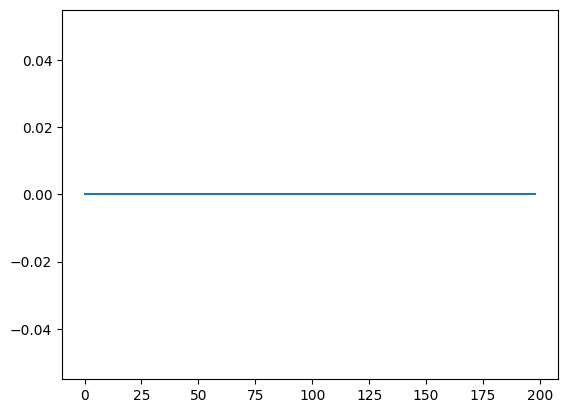

In [ ]:
my_arr = []
for i in range(1,200):
    my_arr.append(np.linalg.matrix_power(P, i)[31,0])
plt.plot(my_arr)

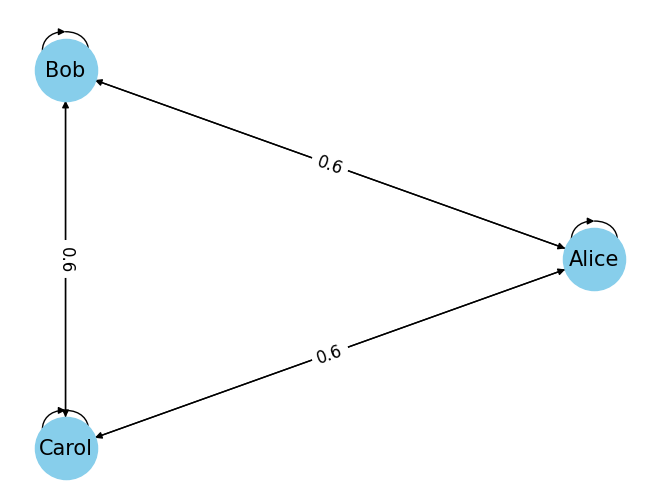

array([[0.5, 0.6, 0.6],
       [0.6, 0.5, 0.6],
       [0.6, 0.6, 0.5]])

In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes for 5 individuals
G.add_node("Alice")
G.add_node("Bob")
G.add_node("Carol")

# Add edges with weights (transition probabilities)
# Assuming the transitions are between all individuals and themselves
transitions = [
    ("Alice", "Bob", 0.6),
    ("Bob", "Alice", 0.6),
    # Adding self-loops for Deniz and Eylul with arbitrary probabilities
    ("Alice", "Alice", 0.5),
    ("Bob", "Bob", 0.5),
    ("Carol", "Alice", 0.6),
    ("Carol", "Bob", 0.6),
    ("Alice", "Carol", 0.6),
    ("Bob", "Carol", 0.6),
    ("Carol", "Carol", 0.5),
]

# Add edges to the graph
for src, dst, weight in transitions:
    G.add_edge(src, dst, weight=weight)

# Position nodes using a layout
pos = nx.circular_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Show plot
plt.show()

adj_matrix = nx.to_numpy_array(G)
adj_matrix

In [ ]:
# Creating a NumPy array 'nums' containing a set of integers
number_of_nodes = G.number_of_nodes()
states = np.arange(2**number_of_nodes)

# Displaying the original vector 'nums'
print("Original vector:")
print(states)

# Creating a binary representation of 'nums' using bitwise operations and reshaping
# The resultant array represents the binary representation of each element in 'nums'
states = ((states.reshape(-1, 1) & (2 ** np.arange(number_of_nodes))) != 0).astype(int)

# Displaying the binary representation of the vector 'nums'
print("\nBinary representation of the said vector:")
print(states)  # Reversing the columns to display binary digits in the correct order

Original vector:
[0 1 2 3 4 5 6 7]

Binary representation of the said vector:
[[0 0 0]
 [1 0 0]
 [0 1 0]
 [1 1 0]
 [0 0 1]
 [1 0 1]
 [0 1 1]
 [1 1 1]]


In [ ]:
no_of_states = len(states)
print(f"no of states = {no_of_states}")
P = np.empty((no_of_states,no_of_states))
for i in range(no_of_states):
    for j in range(no_of_states):
        s_init = states[i]
        s_target = states[j]
        p_healthy = np.prod(1-(s_init * adj_matrix), axis=1)
        P[i,j] = np.prod(np.abs(s_target-p_healthy))
np.set_printoptions(precision=2)
print(P)

no of states = 8
[[1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [8.00e-02 8.00e-02 1.20e-01 1.20e-01 1.20e-01 1.20e-01 1.80e-01 1.80e-01]
 [8.00e-02 1.20e-01 8.00e-02 1.20e-01 1.20e-01 1.80e-01 1.20e-01 1.80e-01]
 [6.40e-03 2.56e-02 2.56e-02 1.02e-01 3.36e-02 1.34e-01 1.34e-01 5.38e-01]
 [8.00e-02 1.20e-01 1.20e-01 1.80e-01 8.00e-02 1.20e-01 1.20e-01 1.80e-01]
 [6.40e-03 2.56e-02 3.36e-02 1.34e-01 2.56e-02 1.02e-01 1.34e-01 5.38e-01]
 [6.40e-03 3.36e-02 2.56e-02 1.34e-01 2.56e-02 1.34e-01 1.02e-01 5.38e-01]
 [5.12e-04 5.89e-03 5.89e-03 6.77e-02 5.89e-03 6.77e-02 6.77e-02 7.79e-01]]


In [ ]:
P

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00],
       [8.00e-02, 8.00e-02, 1.20e-01, 1.20e-01, 1.20e-01, 1.20e-01,
        1.80e-01, 1.80e-01],
       [8.00e-02, 1.20e-01, 8.00e-02, 1.20e-01, 1.20e-01, 1.80e-01,
        1.20e-01, 1.80e-01],
       [6.40e-03, 2.56e-02, 2.56e-02, 1.02e-01, 3.36e-02, 1.34e-01,
        1.34e-01, 5.38e-01],
       [8.00e-02, 1.20e-01, 1.20e-01, 1.80e-01, 8.00e-02, 1.20e-01,
        1.20e-01, 1.80e-01],
       [6.40e-03, 2.56e-02, 3.36e-02, 1.34e-01, 2.56e-02, 1.02e-01,
        1.34e-01, 5.38e-01],
       [6.40e-03, 3.36e-02, 2.56e-02, 1.34e-01, 2.56e-02, 1.34e-01,
        1.02e-01, 5.38e-01],
       [5.12e-04, 5.89e-03, 5.89e-03, 6.77e-02, 5.89e-03, 6.77e-02,
        6.77e-02, 7.79e-01]])

In [ ]:
G_states=nx.from_numpy_array(P)

In [ ]:
G_states.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7))

In [ ]:
mapping = {0:"s0", 1:"s1", 2:"s2", 3:"s3", 4:"s4", 5:"s5", 6:"s6", 7:"s7"}
G_states = nx.relabel_nodes(G_states, mapping, copy=False)

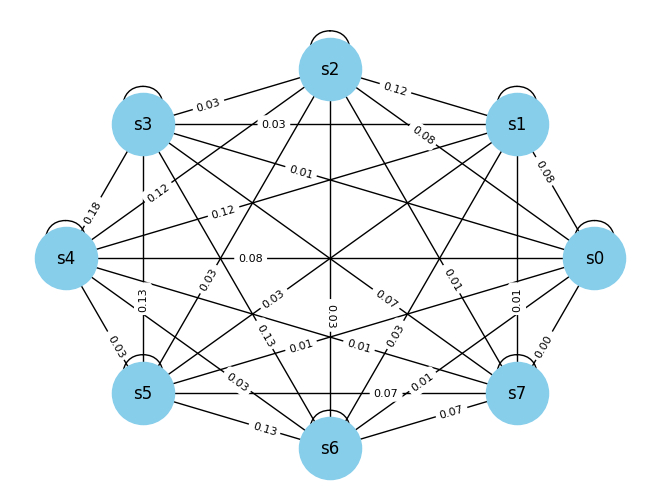

In [ ]:
# Position nodes using a layout
pos = nx.circular_layout(G_states)

# Draw the graph
nx.draw(G_states, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=12)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G_states, 'weight')
edge_labels = dict([((u,v,), f"{d['weight']:.2f}") for u,v,d in G_states.edges(data=True)])
nx.draw_networkx_edge_labels(G_states, pos, edge_labels=edge_labels, font_size=8, label_pos=0.35)

# Show plot
plt.show()

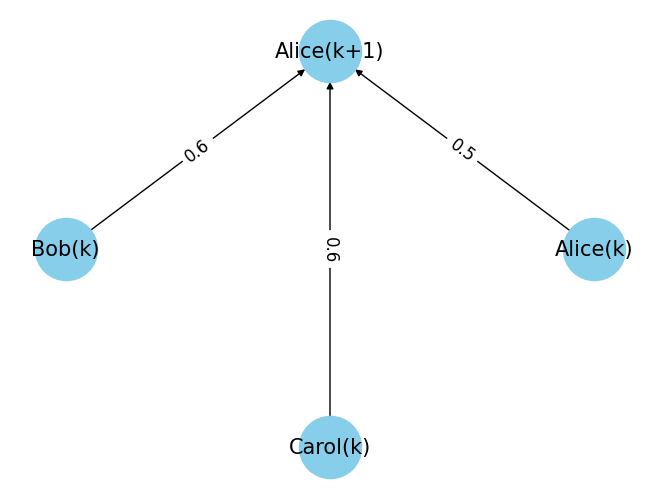

array([[0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0. ],
       [0. , 0.6, 0. , 0. ]])

In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes for 5 individuals
# G.add_node("Alice")
# G.add_node("Bob")
# G.add_node("Carol")

# Add edges with weights (transition probabilities)
# Assuming the transitions are between all individuals and themselves
transitions = [
    ("Alice(k)", "Alice(k+1)", 0.5),
    ("Bob(k)", "Alice(k+1)", 0.6),
    ("Carol(k)", "Alice(k+1)", 0.6),

]

# Add edges to the graph
for src, dst, weight in transitions:
    G.add_edge(src, dst, weight=weight)

# Position nodes using a layout
pos = nx.circular_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Show plot
plt.show()

adj_matrix = nx.to_numpy_array(G)
adj_matrix